<a href="https://colab.research.google.com/github/bpak1297/Data-Analytics/blob/main/Fall2021_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("GGally")
install.packages("ggplot2")
install.packages("car")
install.packages("MASS")
install.packages("olsrr")

library(olsrr)
library(ggplot2)
library(GGally)
library(car)
library(MASS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘goftest’, ‘gridExtra’, ‘nortest’



Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: carData


Attaching

## Set Global Plot Sizes

In [ ]:
options(repr.plot.width=20, repr.plot.height=10)

## Load Data:

First step is to upload the dataset into your GitHub, then get the `raw` data link and copy below:

In [ ]:
# If .csv:

data <- read.csv('https://raw.githubusercontent.com/jtabalon/STAT610/master/data_file.csv', header=TRUE) 

In [ ]:
# If .txt:

# data <- read.table('link', header=TRUE)

## View Data Frame:

In [ ]:
head(data)

,School,Enrollment,Cost.Pupil,AveTeach.,SATV,SATM,SATPartRate,X10GMCASEng,X10GMCASMth,S.TRatio,S.CounselRatio,DropoutRate
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,1,563,7243,45833,507,503,0.78,242,242,11,188,1.5
2,2,1490,6720,49260,587,603,0.91,253,256,17,213,0.1
3,3,1056,8070,47871,534,567,0.95,248,249,11,211,1.6
4,4,796,6385,38913,505,498,0.75,242,241,16,265,1.5
5,5,1626,6694,49402,544,575,0.94,245,248,14,232,0.7
6,6,1059,7688,45039,526,535,0.91,246,245,12,267,1.2


In [ ]:
# Look at summary statistics for each column.


summary(data)

     School        Enrollment     Cost.Pupil      AveTeach.          SATV      
 Min.   :  1.0   Min.   : 266   Min.   : 4675   Min.   :32067   Min.   :387.0  
 1st Qu.: 34.5   1st Qu.: 749   1st Qu.: 6285   1st Qu.:44860   1st Qu.:491.0  
 Median : 68.0   Median : 998   Median : 6778   Median :47015   Median :516.0  
 Mean   : 68.0   Mean   :1103   Mean   : 7112   Mean   :46963   Mean   :512.6  
 3rd Qu.:101.5   3rd Qu.:1316   3rd Qu.: 7748   3rd Qu.:49418   3rd Qu.:539.0  
 Max.   :135.0   Max.   :3945   Max.   :12586   Max.   :66654   Max.   :609.0  
      SATM        SATPartRate      X10GMCASEng     X10GMCASMth   
 Min.   :381.0   Min.   :0.4500   Min.   :223.0   Min.   :221.0  
 1st Qu.:485.5   1st Qu.:0.7500   1st Qu.:238.0   1st Qu.:237.0  
 Median :518.0   Median :0.8200   Median :244.0   Median :242.0  
 Mean   :518.3   Mean   :0.8079   Mean   :243.4   Mean   :241.8  
 3rd Qu.:541.5   3rd Qu.:0.9200   3rd Qu.:249.0   3rd Qu.:248.0  
 Max.   :617.0   Max.   :1.0000   Max.   :25

## Look at Pairs Plots

Warning message in warn_if_args_exist(list(...)):
“Extra arguments: 'binwidth' are being ignored.  If these are meant to be aesthetics, submit them using the 'mapping' variable within ggpairs with ggplot2::aes or ggplot2::aes_string.”


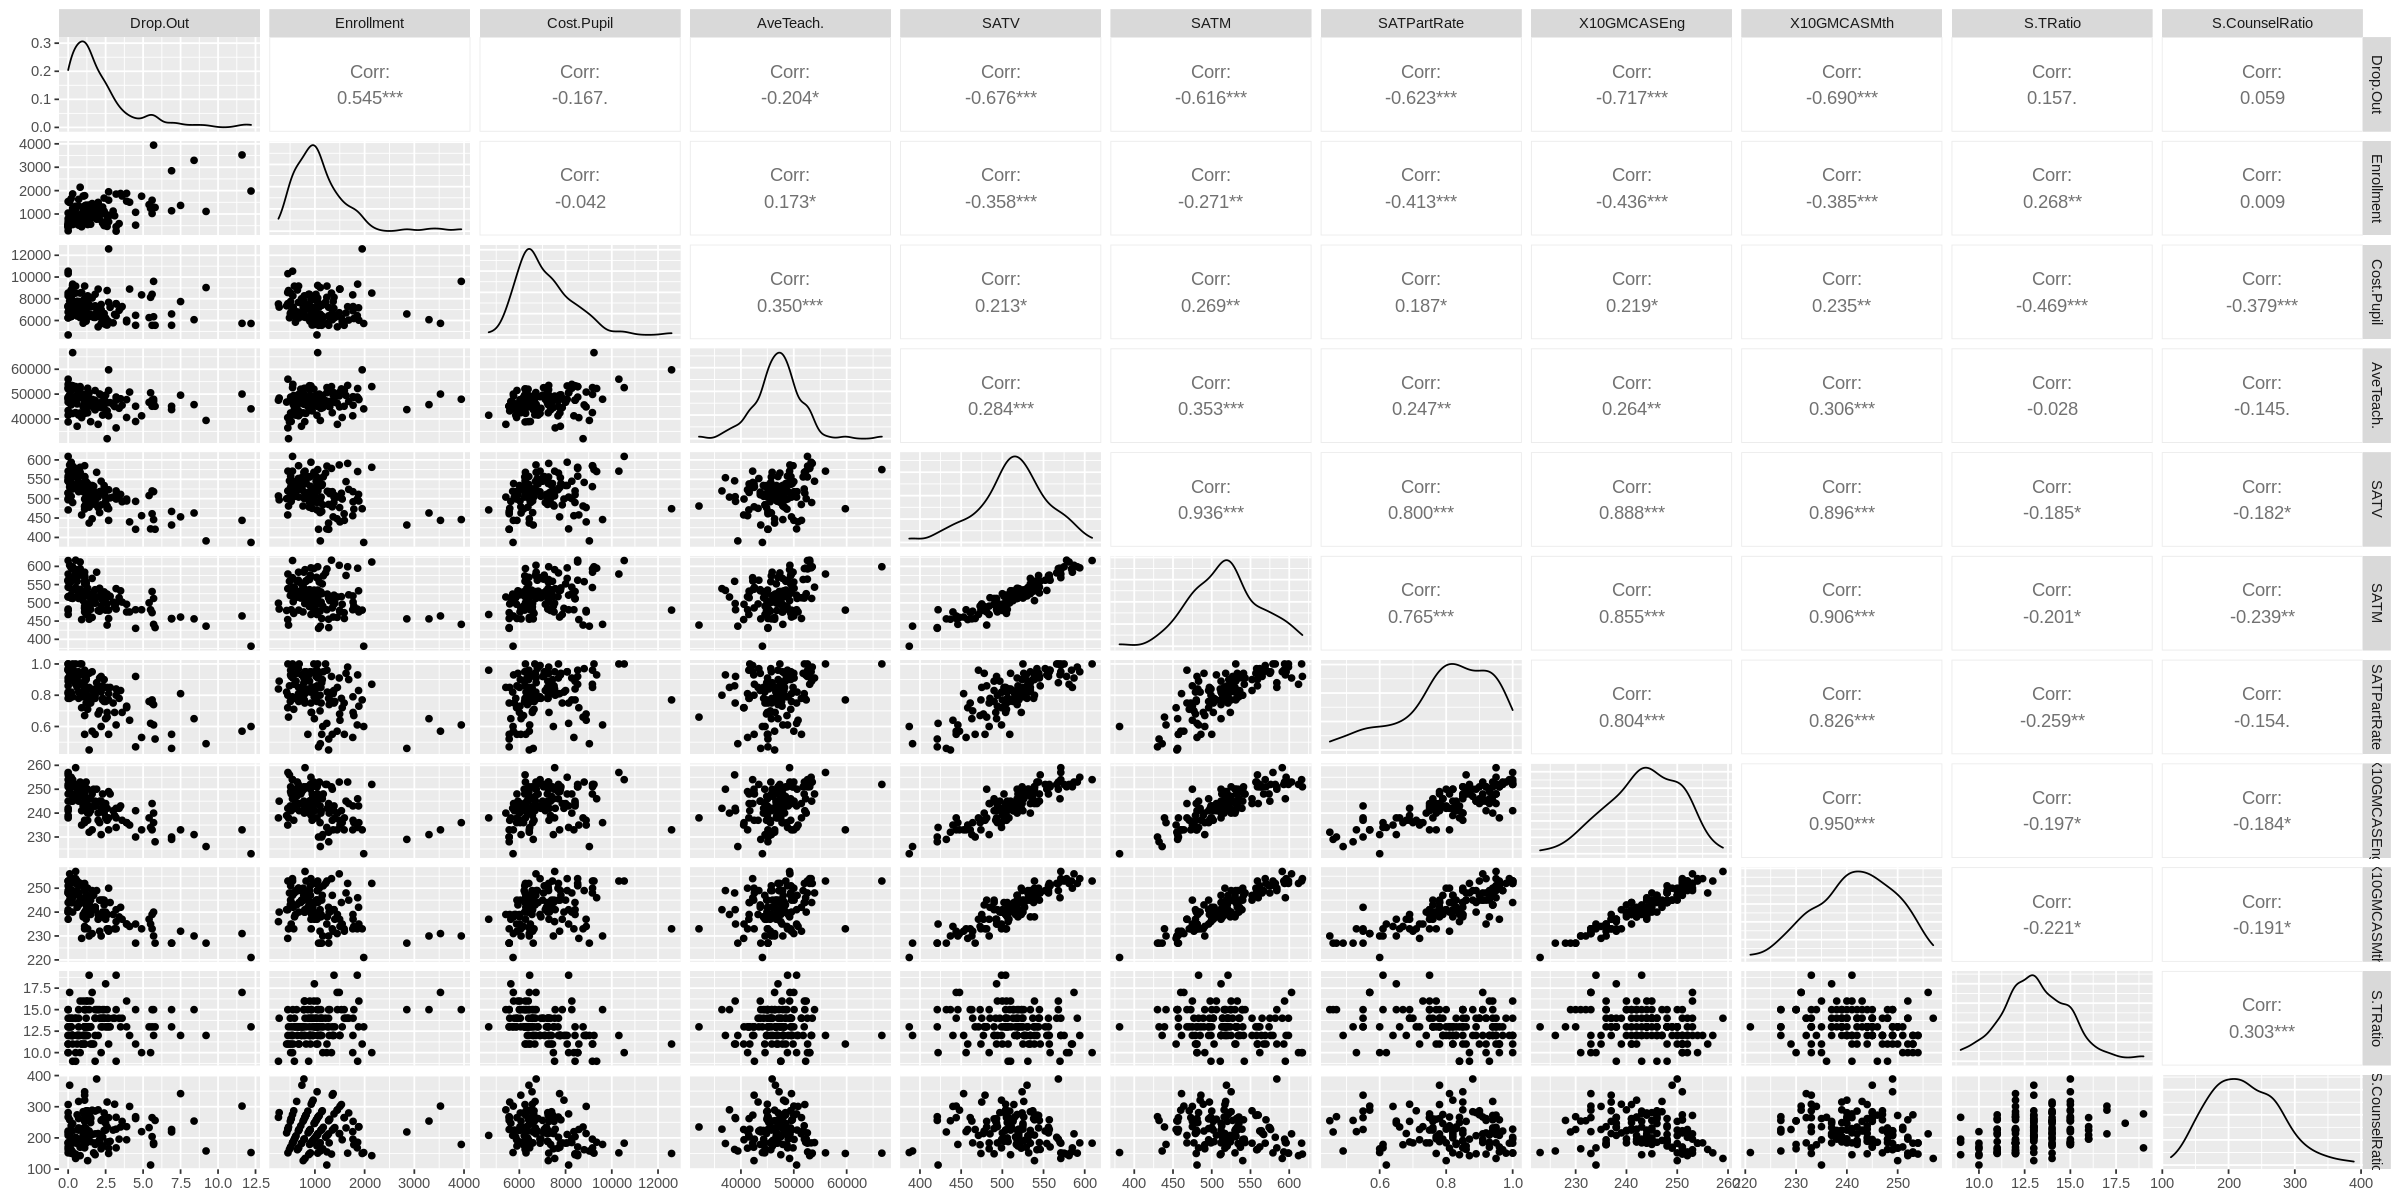

In [ ]:
pairs_plot <- data.frame("Drop Out" = data$DropoutRate, 
                         "Enrollment" = data$Enrollment, 
                         "Cost/Pupil" = data$Cost.Pupil,
                         "AveTeach$" = data$AveTeach,
                         "SATV" = data$SATV,
                         "SATM" = data$SATM,
                         "SATPartRate" = data$SATPartRate,
                         "X10GMCASEng" = data$X10GMCASEng,
                         "X10GMCASMth" = data$X10GMCASMth ,
                         "S.TRatio" = data$S.TRatio ,
                         "S.CounselRatio" = data$S.CounselRatio
                         )

ggpairs(pairs_plot, binwidth=30)


## Assess normality of Response Variable

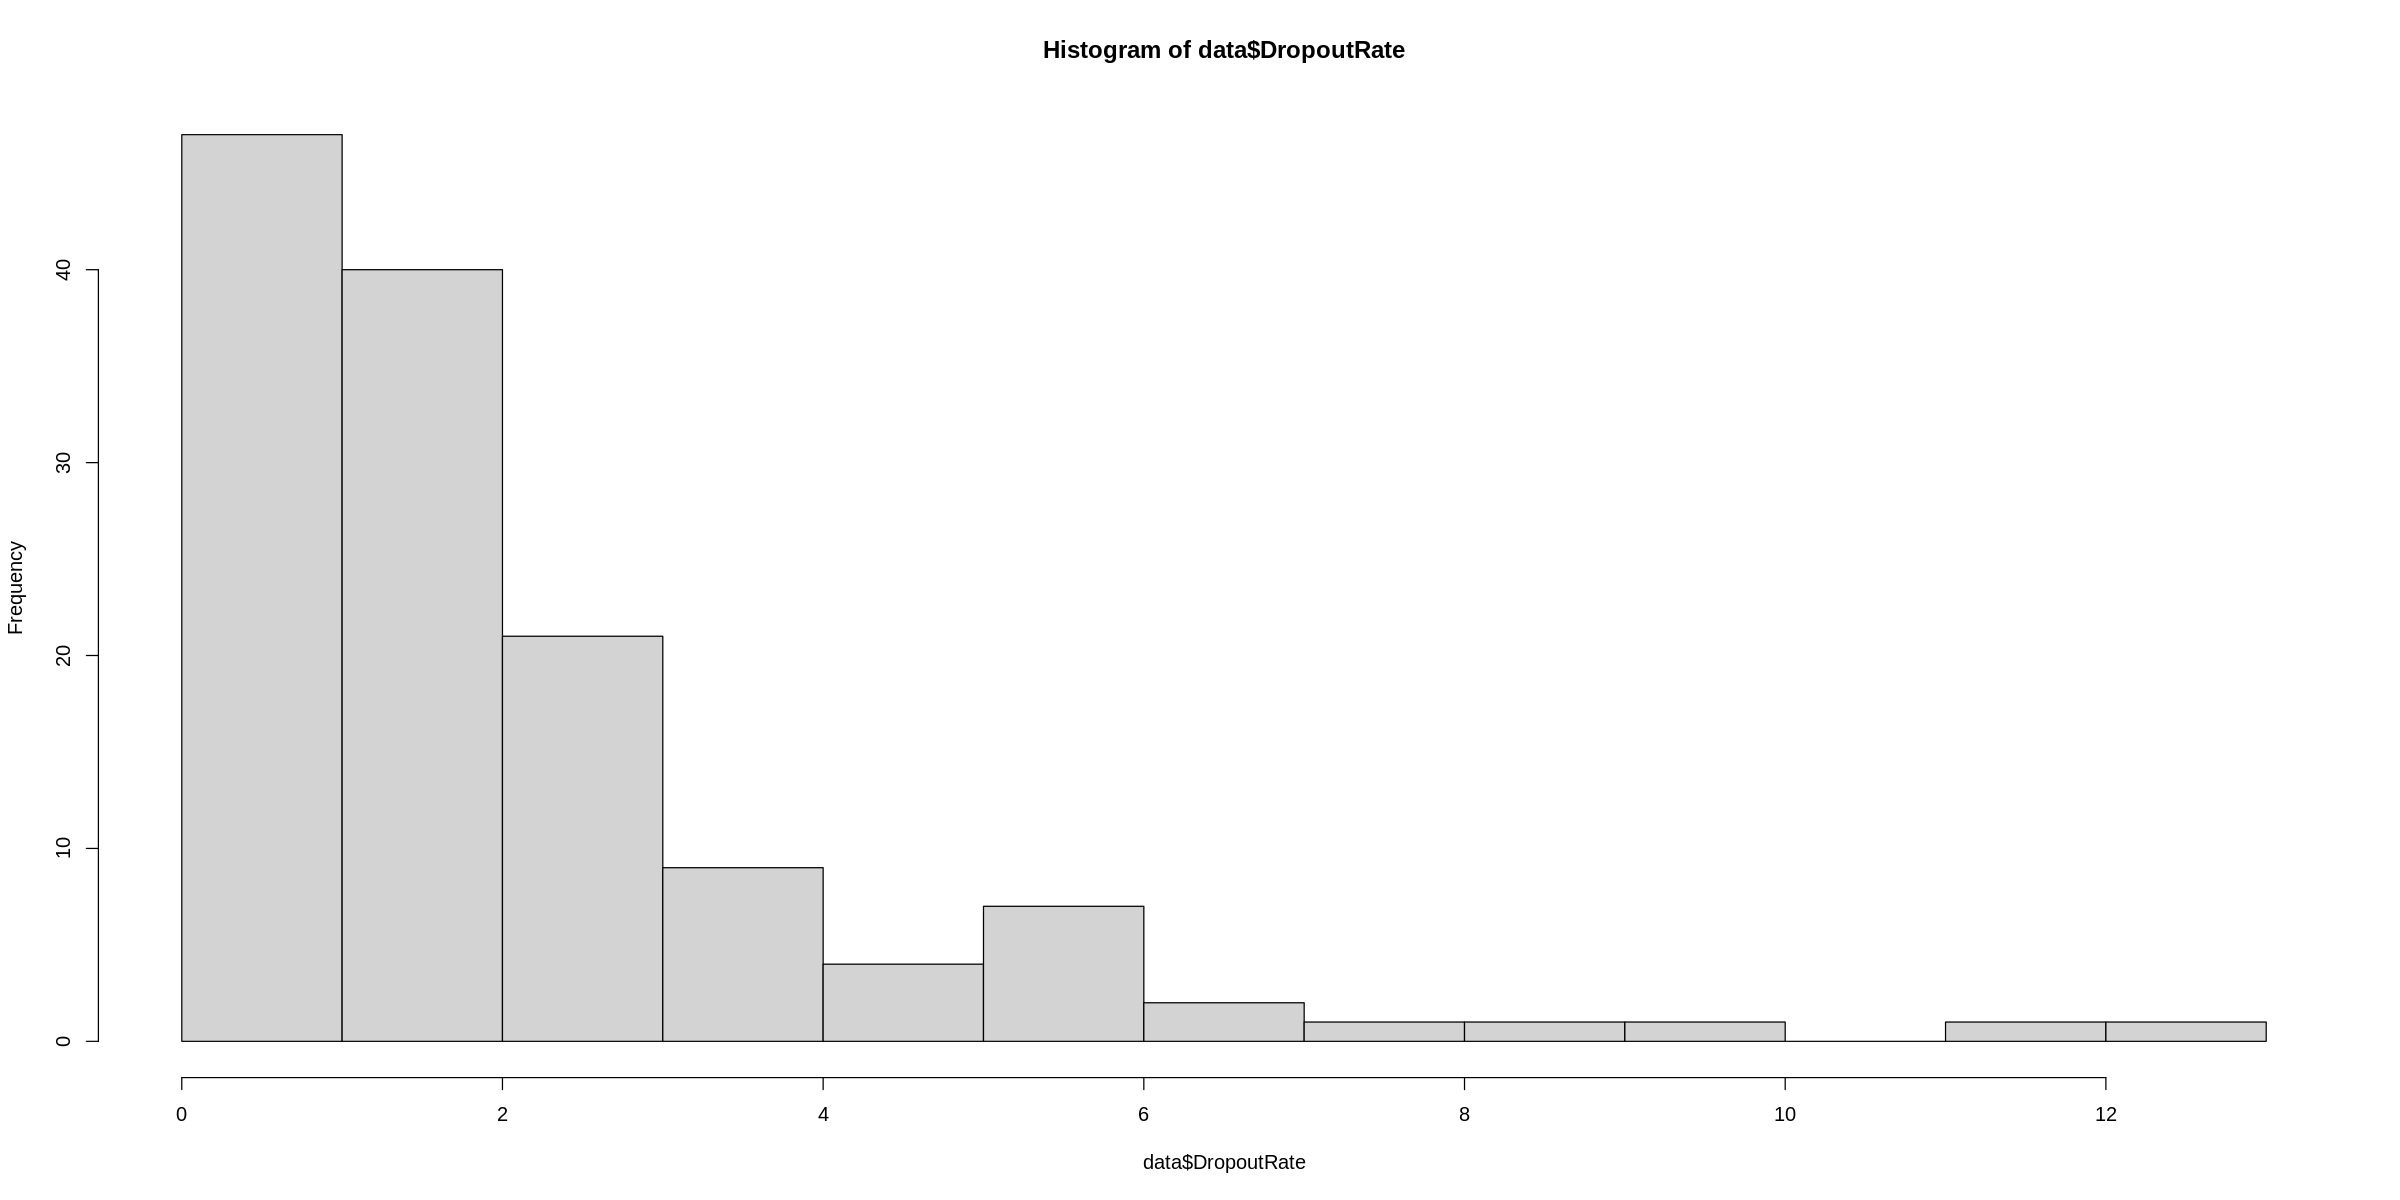

In [ ]:
hist(data$DropoutRate)

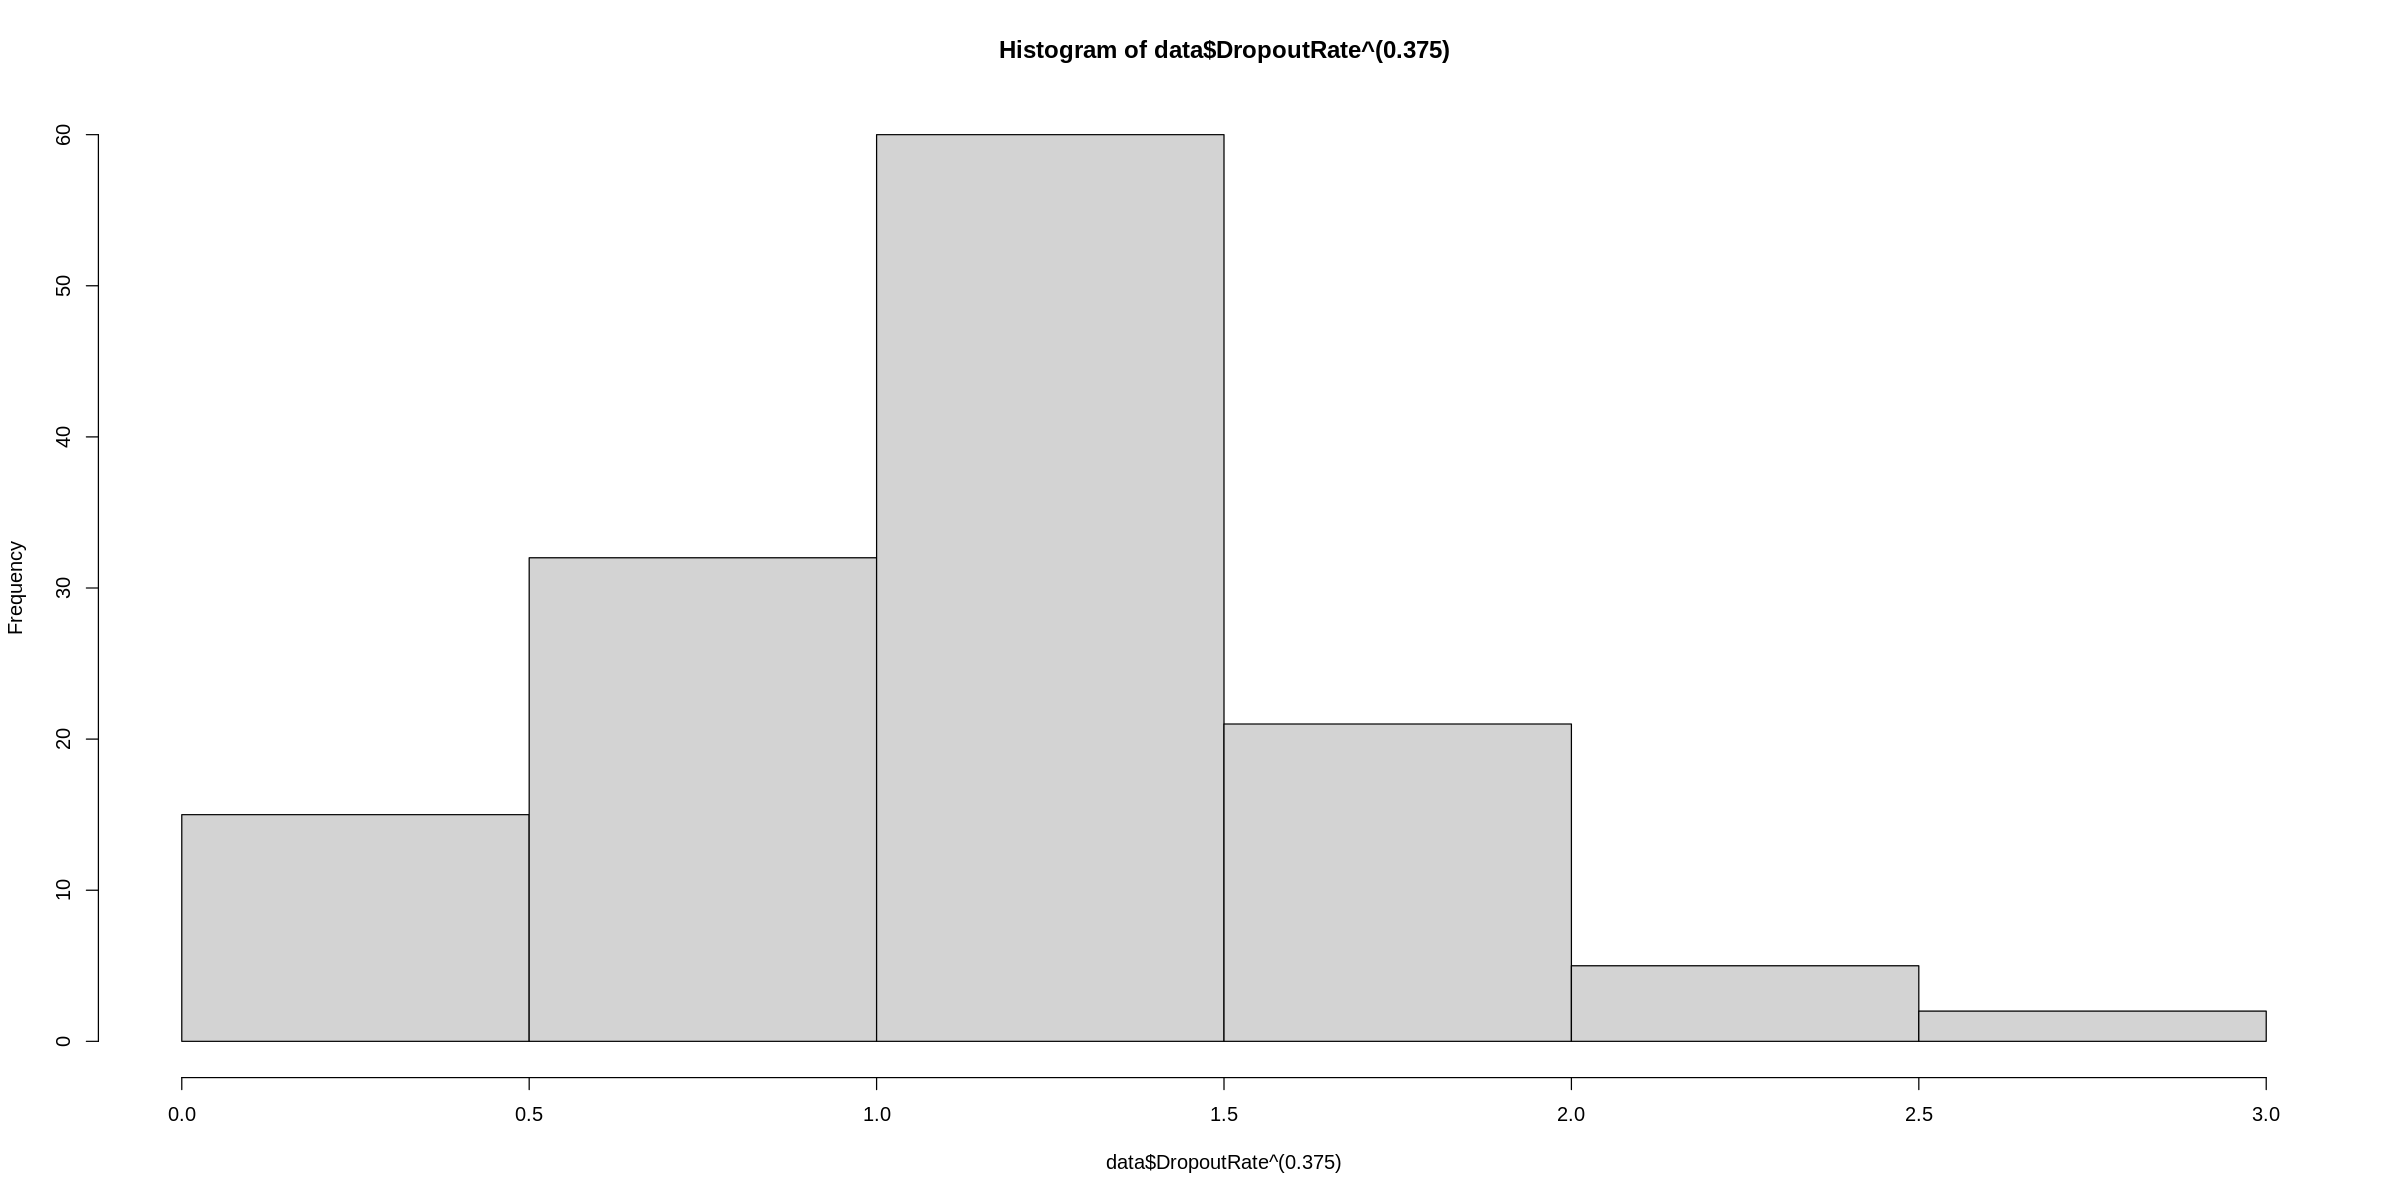

In [ ]:
hist(data$DropoutRate^(0.375))

In [ ]:
|data$DropoutRate1 = data$DropoutRate + 0.0001

In [ ]:
head(data)

,School,Enrollment,Cost.Pupil,AveTeach.,SATV,SATM,SATPartRate,X10GMCASEng,X10GMCASMth,S.TRatio,S.CounselRatio,DropoutRate,DropoutRate1
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,1,563,7243,45833,507,503,0.78,242,242,11,188,1.5,1.5001
2,2,1490,6720,49260,587,603,0.91,253,256,17,213,0.1,0.1001
3,3,1056,8070,47871,534,567,0.95,248,249,11,211,1.6,1.6001
4,4,796,6385,38913,505,498,0.75,242,241,16,265,1.5,1.5001
5,5,1626,6694,49402,544,575,0.94,245,248,14,232,0.7,0.7001
6,6,1059,7688,45039,526,535,0.91,246,245,12,267,1.2,1.2001


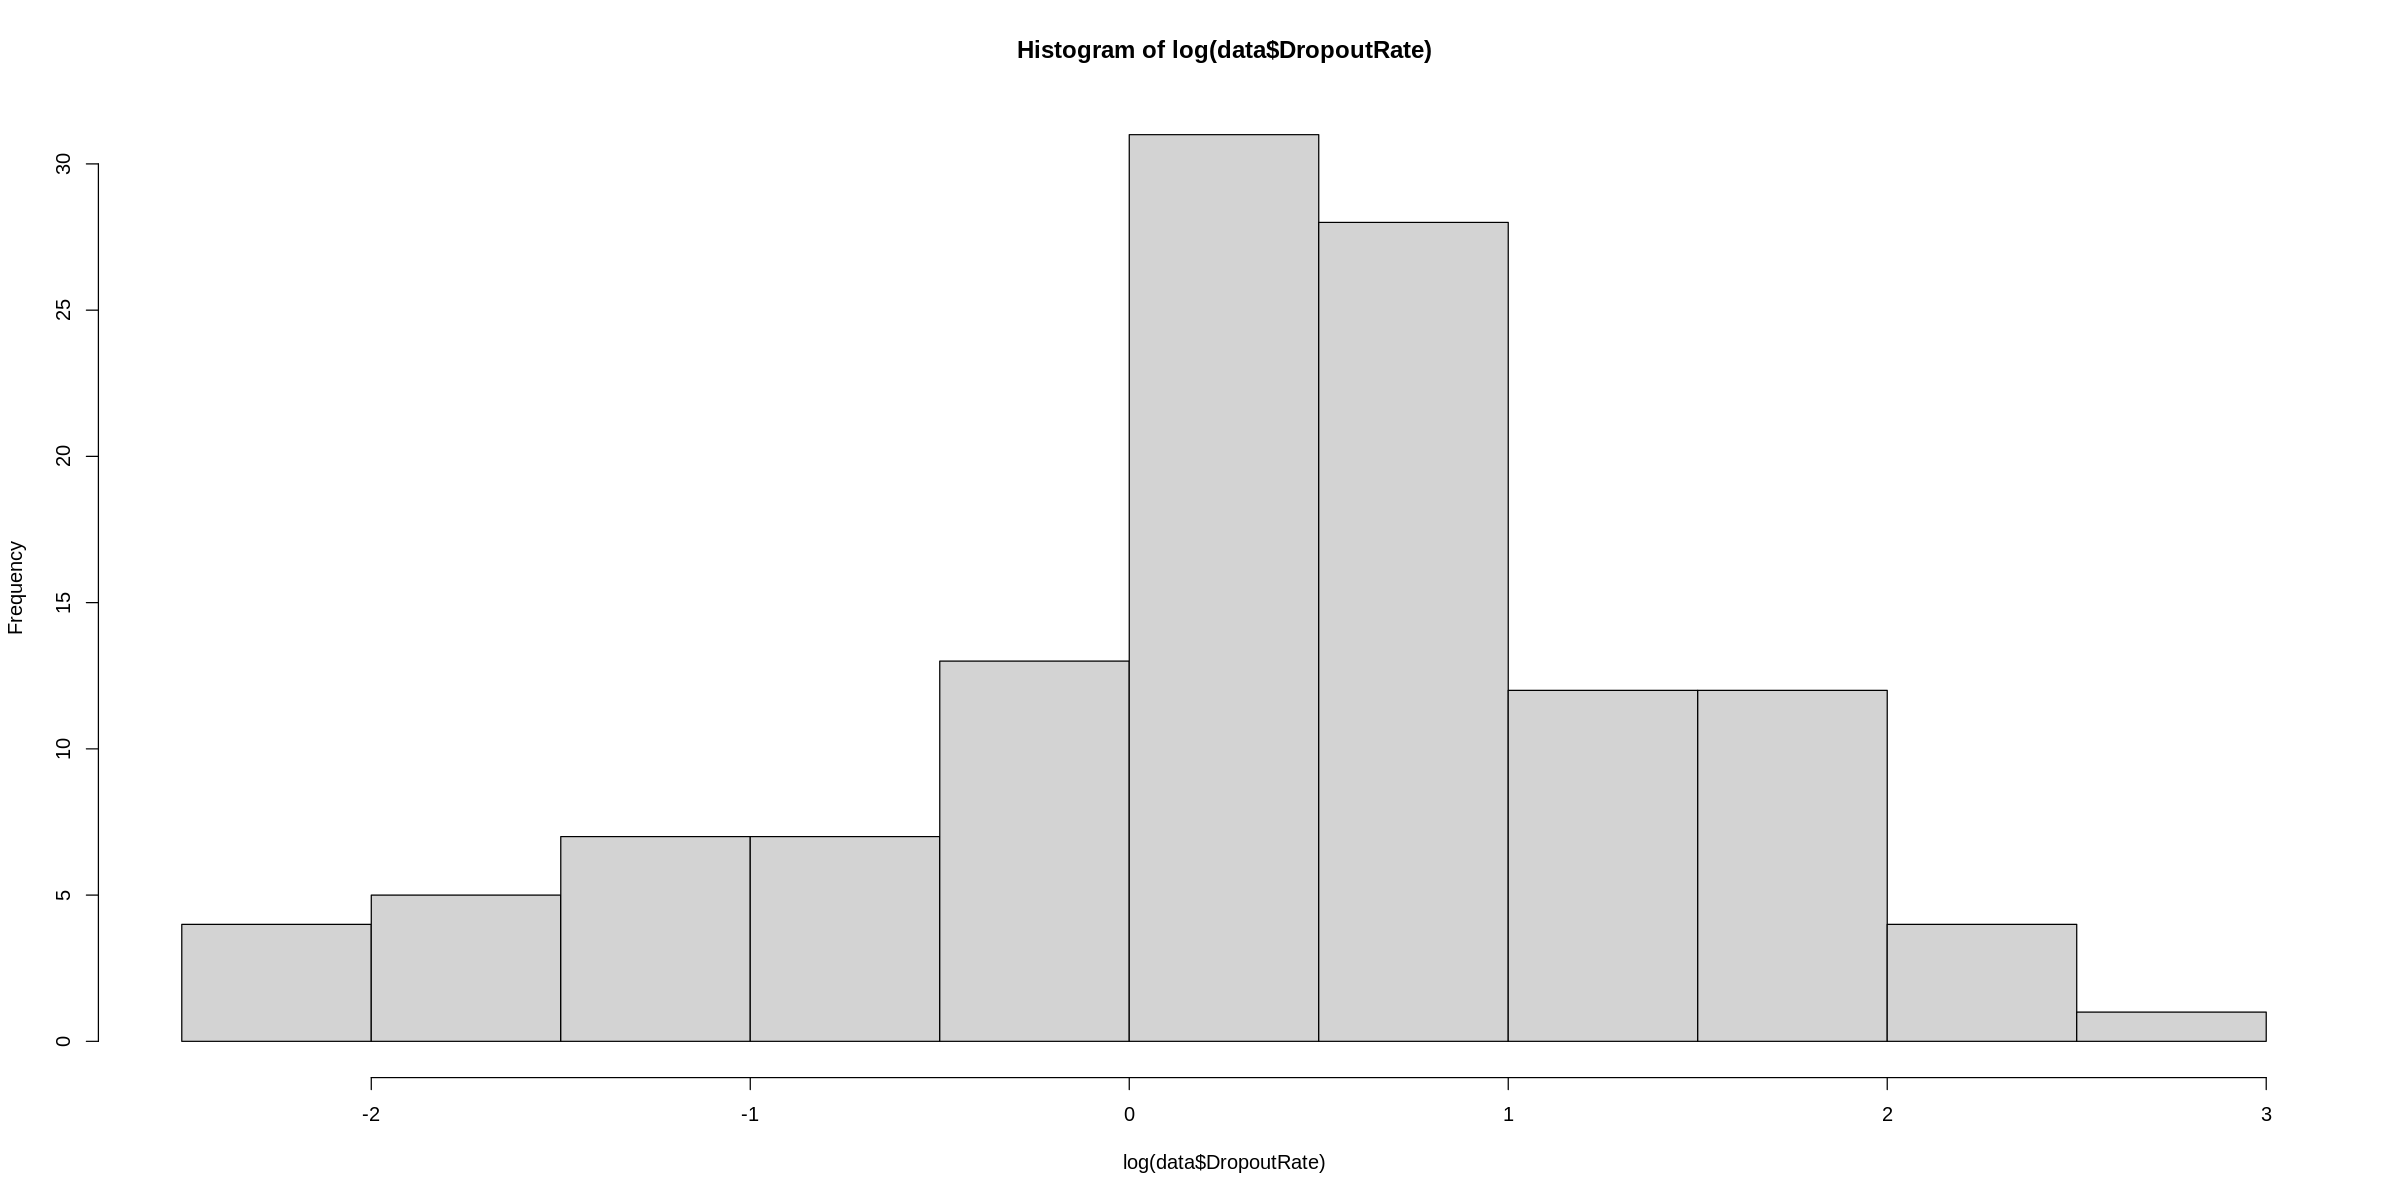

In [ ]:
hist(log(data$DropoutRate))

### If not normal, perform BoxCox:

In [ ]:
lm(DropoutRate ~ SATV + SATM + S.TRatio, data = data)


Call:
lm(formula = DropoutRate ~ SATV + SATM + S.TRatio, data = data)

Coefficients:
(Intercept)         SATV         SATM     S.TRatio  
  19.528854    -0.042128     0.006854     0.042913  


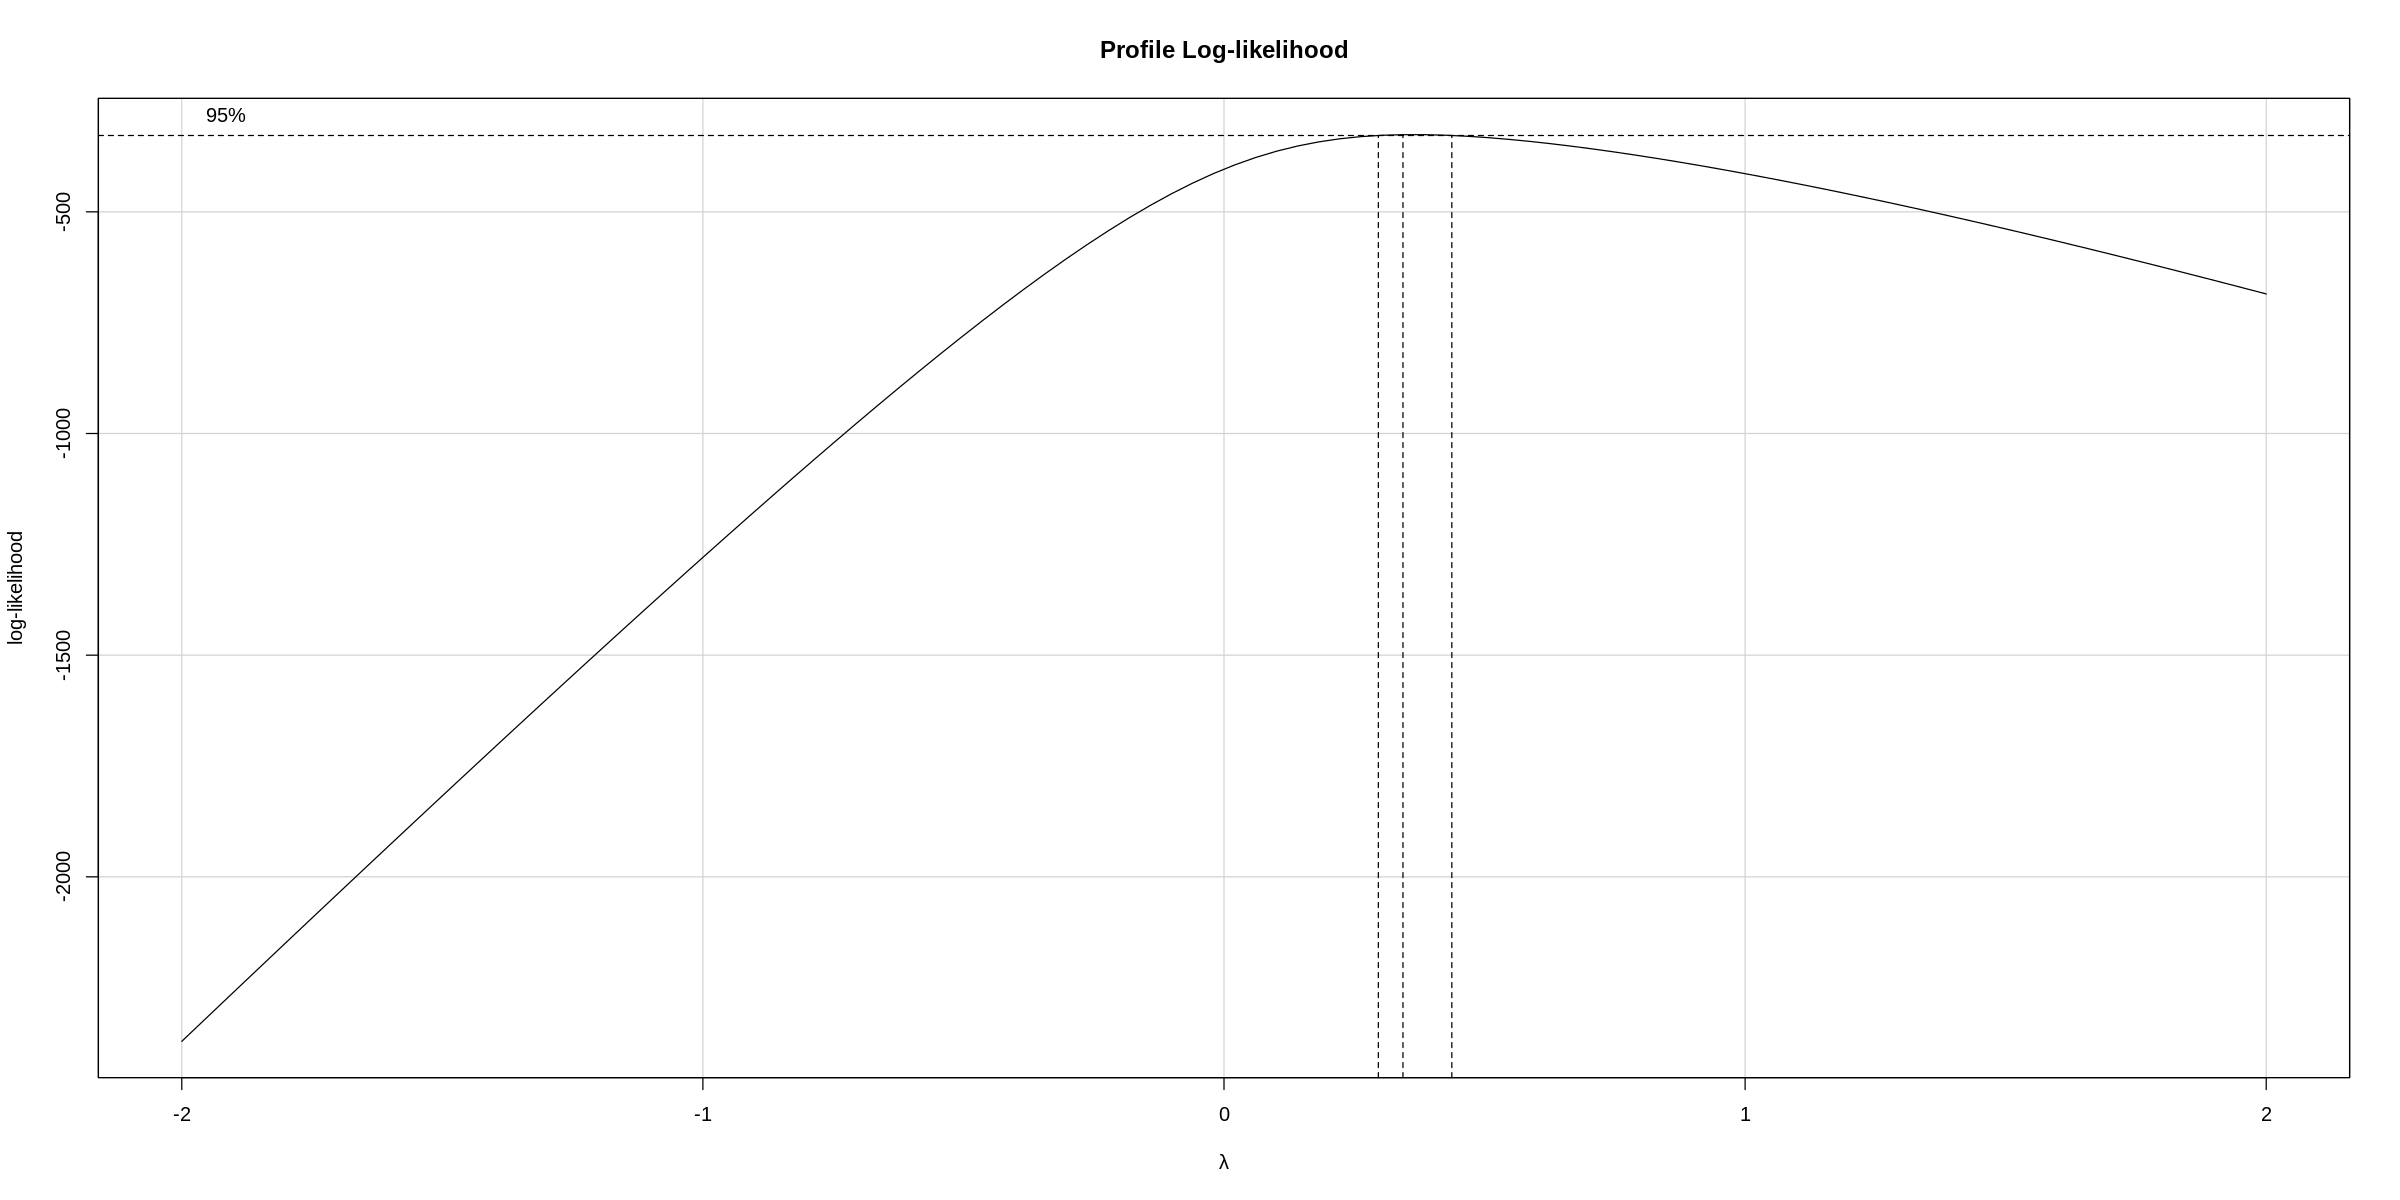

In [ ]:
boxCox(lm(DropoutRate1 ~ Enrollment, data = data))
#boxCox(lm(DropoutRate ~ SATV + SATM + S.TRatio, data = data))


Here are the appropriate transformations depending on the $\lambda$ values from BoxCox:

$\lambda = -3$: 1/y**3 

$\lambda = -2$: 1/ y**2 

$\lambda = -1$: 1/ y  

$\lambda = -0.5$ 1/sqrt(y) 

$\lambda = 0$  log(y)

$\lambda = 0.5$  sqrt(y)

$\lambda = 1$  y

$\lambda = 2$  y**2

$\lambda = 3$  y**3

[reference](https://www.statisticshowto.com/box-cox-transformation/)

Visualize applied transformation:


In [ ]:
#hist(log(data$response))

## Revisualize pairs_plot with transformations:

In [ ]:
# pairs_plot <- data.frame("Response Variable" = data$response, ### ON THIS LINE CHANGE TRANSFORM
#                         "Explanatory 1" = data$explanatory1, 
#                         "Explanatory 2" = data$explanatory2,
#                         "Explanatory 3" = data$explanatory3,
#                         "Explanatory 4" = data$explanatory4
#                         )

#ggpairs(pairs_plot, binwidth=30)

## Rerun regression with transformed dependent:

In [ ]:
# response_transformed_fit <- lm(response ~ explanatory1, explanatory2, explanatory3, data = data)
# summary(response_transformed_fit)
### NOTE TRANSFORMATION ON RESPONSE

We plot our `summary(fit)` in order to check against our needed MLR assumptions. Here we can check the following:
- $E(\epsilon_{i}) = 0$ 
- $Cov(\epsilon_{i}, \epsilon_{j}) = 0$
- $Var(\epsilon_{i}) = \sigma^2$

In [ ]:
# Plot assumptions/residuals plots:

# plot(response_transformed_fit)

## Rerun Pairs Plots to Assess Functional Relationships

In [ ]:
# pairs_plot <- data.frame("Response Variable" = data$response, ### ON THIS LINE CHANGE TRANSFORM
#                         "Explanatory 1" = data$explanatory1, 
#                         "Explanatory 2" = data$explanatory2,
#                         "Explanatory 3" = data$explanatory3,
#                         "Explanatory 4" = data$explanatory4
#                         )

#ggpairs(pairs_plot, binwidth=30)

Copy and paste above if applying transformations to EXPLANATORY and visualizing changes, to address functional relationship. 

Specifically, we need to make sure the explanatory variables express a `linear` relationship with the response.

**Redo above** for many iterations to find the best relationships with the response variable

## Rerun Regression Modeling WITH TRANSFORMATIONS

In [ ]:
# response_and_explanatory_fit <- lm(log(response) ~ explanatory1, log(explanatory2), explanatory3)
# summary(response_and_explanatory_fit)


In [ ]:
# plot(response_and_explanatory_fit)

## Use StepWise Regression to Find Best Model

In [ ]:
# From library(MASS), we use:

# AIC <- step(response_and_explanatory_fit)

Based on our stepwise regression, the model with the *lowest* AIC value will be our best model. We can choose to use the last regression provided by stepwise.

In [ ]:
# final_model <- lm(response ~ explanatory1, log(explanatory2), explanatory3)

# summary(final_model)

In [ ]:
# Now plot our final model to assess regression assumptions:

# plot(final_model)

Resource for how to read Linear Regression Plots [link](https://data.library.virginia.edu/diagnostic-plots/)

## Look for multicollinearity:

In [ ]:
# Use VIF (Variance Inflation Factor) to evaluate multicollinearity:

# vif(final_model)

We can use Variance Inflation Factor to evaluate multicollinearity:

- 1 = not correlated.
- Between 1 and 5 = moderately correlated.
- Greater than 5 = highly correlated.

## Now look for Outliers:

Throughout the regression process, we can evaluate the Cook's Distance plot (last plot of the `plot(lm())`. We can also use the Studentized Residuals Plot.

In [ ]:
# from library(olsrr):

# resid_plot<-ols_plot_resid_stud(final_model)
# head(resid_plot$data)

From here we investigate the specific outliers visualized from the above plot.

To investigate a specific **row**:

In [ ]:
# investigate row

# data[c(data_point_number),]

In [ ]:
# compare against summary of columns:

# summary(data)

In [ ]:
# create model without outlier:

# new_data <- data[-c(data_point_number),]

Repeat for each outlier, or do all at once.

## Create Final Model using data W/O Outliers

In [ ]:
# final_model_no_outliers <- lm(response ~ explanatory, data=new_data)

In [ ]:
# 

# plot(final_model_no_outliers)

In [ ]:
#  <- lm(log(response) ~ explanatory1, log(explanatory2), explanatory3)

# summary(response_and_explanatory_fit)
